# Linear Regression Model- Cancer Regression Dataset

In [ ]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# Read the dataset
data = pd.read_csv('cancer_reg.csv')

# Display information about the dataset
data.info()  # Overall Information
data.describe()  # Display summary statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


From the information, we can see that there are data types that are non-numerical - object(2)
And therefore, we must remove them before continuing

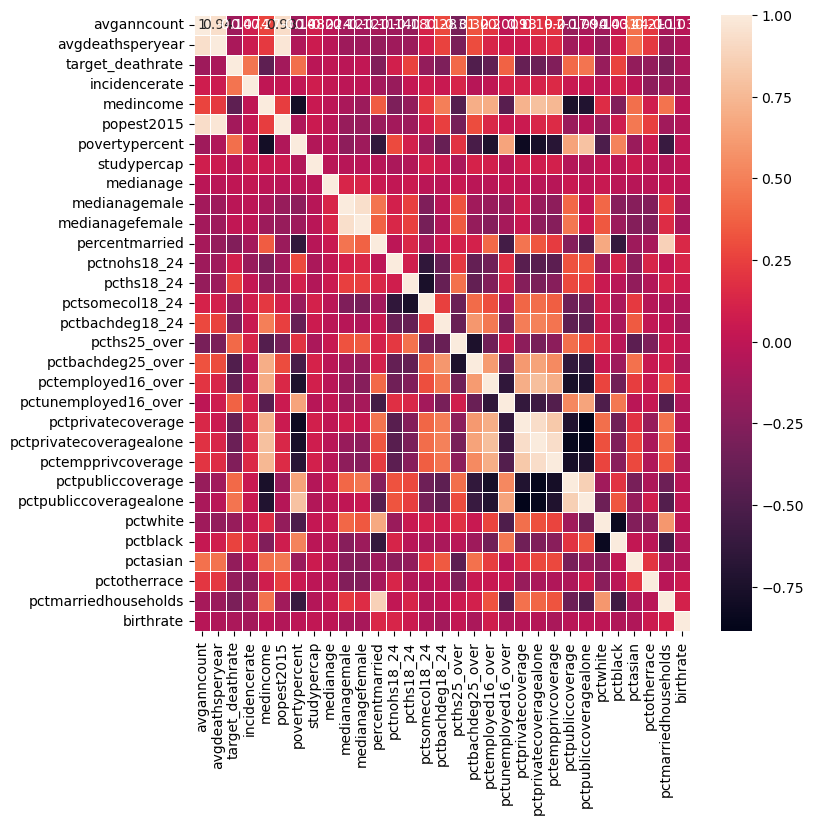

In [7]:
# Drop non-numeric columns that aren't needed for correlation analysis
data = data.select_dtypes(include=[np.number])

data.corr()  # Display the correlation matrix of the dataset
fig, axes = plt.subplots(figsize=(8, 8)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

In [ ]:
# Look at features and target variable

X = data.drop('avgdeathsperyear', axis=1)  # Features
y = data['avgdeathsperyear']  # Target variable
# Split the dataset into training and testing sets  
print(X)
print(y)

      avganncount  target_deathrate  incidencerate  medincome  popest2015  \
0     1397.000000             164.9     489.800000      61898      260131   
1      173.000000             161.3     411.600000      48127       43269   
2      102.000000             174.7     349.700000      49348       21026   
3      427.000000             194.8     430.400000      44243       75882   
4       57.000000             144.4     350.100000      49955       10321   
...           ...               ...            ...        ...         ...   
3042  1962.667684             149.6     453.549422      46961        6343   
3043  1962.667684             150.1     453.549422      48609       37118   
3044  1962.667684             153.9     453.549422      51144       34536   
3045  1962.667684             175.0     453.549422      50745       25609   
3046  1962.667684             213.6     453.549422      41193       37030   

      povertypercent  studypercap  medianage  medianagemale  medianagefemal

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check for missing values
print(X_train.isnull().sum())

# Fill missing values with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training data mean for consistency

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


avganncount                   0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            1593
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over           95
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     425
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrate                     0
dtype: int64


LinearRegression()

In [12]:
y_pred = model.predict(X_test)  # Make predictions on the test set

# Predict on training set for evaluation
y_pred_train = model.predict(X_train)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared score
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")



Mean Squared Error: 14884.238502854128
Mean Absolute Error: 46.547221419873566
R-squared: 0.9602640582152521


In [ ]:
mse_test = mean_squared_error(y_test, y_pred)  # Mean Squared Error on test set
mae_test = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error on test set
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test Mean Absolute Error: {mae_test}")
print(f"Test R-squared: {r2}")

Test Mean Squared Error: 14884.238502854128
Test Mean Absolute Error: 46.547221419873566
Test R-squared: 0.9602640582152521


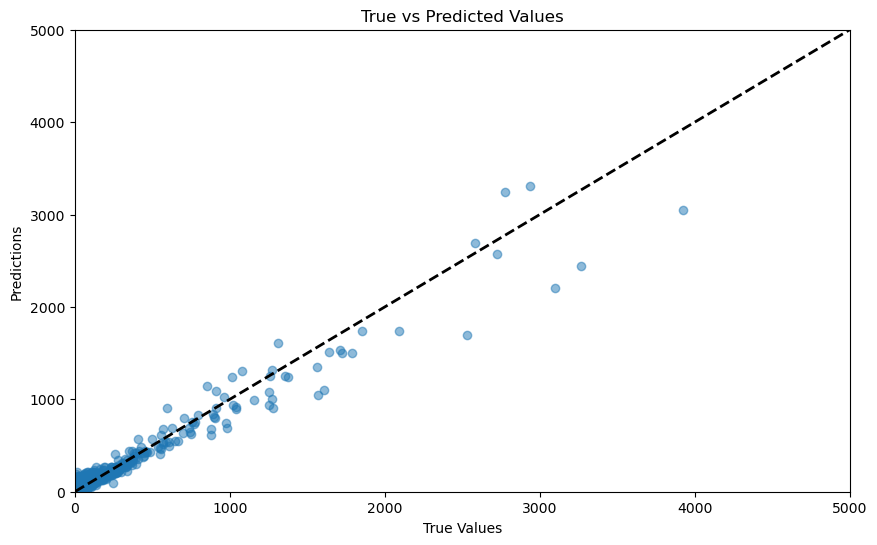

In [21]:
# plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()
